# Tarea 1 Análisis de Datos
## Cuando hubo más gente en cuarentena desde marzo del 2020 por región?

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')
df.head() # Se lee documento con las fases de las comunas según Plan Paso a Paso

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [48]:
df.drop_duplicates()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5


In [49]:
df1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2021-10-01-CasosConfirmados.csv')
df1
df1.info() # Se lee documento con dato de poblacion de comunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             362 non-null    object 
 1   Codigo region      362 non-null    int64  
 2   Comuna             362 non-null    object 
 3   Codigo comuna      346 non-null    float64
 4   Poblacion          346 non-null    float64
 5   Casos Confirmados  362 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.1+ KB


In [50]:
df1.dropna()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,Arica y Parinacota,15,Arica,15101.0,247552.0,30376.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,70.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,88.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,213.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0,15942.0
...,...,...,...,...,...,...
356,Magallanes,12,Punta Arenas,12101.0,141984.0,25161.0
357,Magallanes,12,Rio Verde,12103.0,211.0,17.0
358,Magallanes,12,San Gregorio,12104.0,681.0,74.0
359,Magallanes,12,Timaukel,12303.0,282.0,42.0


In [51]:
df11 = df1.drop(['Casos Confirmados'], axis = 1) #elimniar columna que no se considera relevante

In [52]:
df111 = df11.dropna()

In [53]:
df111['Codigo comuna'].astype(int) #cambio a int

0      15101
1      15102
2      15202
3      15201
5       1107
       ...  
356    12101
357    12103
358    12104
359    12303
360    12402
Name: Codigo comuna, Length: 346, dtype: int32

In [54]:
df0 =df.rename(columns={'codigo_comuna':'Codigo comuna'}) #cambio de nombre columna para que tengan el mismo nombre en ambos dataframe

In [55]:
df01 = df0.merge(df111, on='Codigo comuna') #combinar ambos dataframe

In [56]:
df7 = df01.drop(['codigo_region','region_residencia','comuna_residencia'], axis=1)
df7 #borrar columnas

,Codigo comuna,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,...,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Region,Codigo region,Comuna,Poblacion
0,15101,Rural,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Arica,247552.0
1,15101,Urbana,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,Arica y Parinacota,15,Arica,247552.0
2,15102,Total,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Camarones,1233.0
3,15202,Total,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,Arica y Parinacota,15,General Lagos,810.0
4,15201,Total,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Putre,2515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12101,Total,3,3,3,3,3,3,3,3,...,4,4,4,4,4,5,Magallanes,12,Punta Arenas,141984.0
382,12103,Total,3,3,3,3,3,3,3,3,...,4,4,4,4,4,5,Magallanes,12,Rio Verde,211.0
383,12104,Total,3,3,3,3,3,3,3,3,...,4,4,4,4,4,5,Magallanes,12,San Gregorio,681.0
384,12303,Total,3,3,3,3,3,3,3,3,...,4,4,4,4,4,5,Magallanes,12,Timaukel,282.0


In [57]:
dfP = pd.melt(df7, id_vars = ['Codigo comuna','Region','Comuna','Codigo region','Poblacion','zona'], var_name = 'Fecha', value_name = "Fase")
dfP #Cambio de orientación, fechas en filas.

,Codigo comuna,Region,Comuna,Codigo region,Poblacion,zona,Fecha,Fase
0,15101,Arica y Parinacota,Arica,15,247552.0,Rural,2020-07-28,3
1,15101,Arica y Parinacota,Arica,15,247552.0,Urbana,2020-07-28,1
2,15102,Arica y Parinacota,Camarones,15,1233.0,Total,2020-07-28,3
3,15202,Arica y Parinacota,General Lagos,15,810.0,Total,2020-07-28,3
4,15201,Arica y Parinacota,Putre,15,2515.0,Total,2020-07-28,3
...,...,...,...,...,...,...,...,...
168291,12101,Magallanes,Punta Arenas,12,141984.0,Total,2021-10-06,5
168292,12103,Magallanes,Rio Verde,12,211.0,Total,2021-10-06,5
168293,12104,Magallanes,San Gregorio,12,681.0,Total,2021-10-06,5
168294,12303,Magallanes,Timaukel,12,282.0,Total,2021-10-06,5


In [58]:
dfP['date'] = pd.to_datetime(dfP['Fecha']) #cambio formato de fecha

In [59]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168296 entries, 0 to 168295
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Codigo comuna  168296 non-null  int64         
 1   Region         168296 non-null  object        
 2   Comuna         168296 non-null  object        
 3   Codigo region  168296 non-null  int64         
 4   Poblacion      168296 non-null  float64       
 5   zona           168296 non-null  object        
 6   Fecha          168296 non-null  object        
 7   Fase           168296 non-null  int64         
 8   date           168296 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 11.6+ MB


In [60]:
dfP #dataframe listo para trabajr los gráficos

,Codigo comuna,Region,Comuna,Codigo region,Poblacion,zona,Fecha,Fase,date
0,15101,Arica y Parinacota,Arica,15,247552.0,Rural,2020-07-28,3,2020-07-28
1,15101,Arica y Parinacota,Arica,15,247552.0,Urbana,2020-07-28,1,2020-07-28
2,15102,Arica y Parinacota,Camarones,15,1233.0,Total,2020-07-28,3,2020-07-28
3,15202,Arica y Parinacota,General Lagos,15,810.0,Total,2020-07-28,3,2020-07-28
4,15201,Arica y Parinacota,Putre,15,2515.0,Total,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...
168291,12101,Magallanes,Punta Arenas,12,141984.0,Total,2021-10-06,5,2021-10-06
168292,12103,Magallanes,Rio Verde,12,211.0,Total,2021-10-06,5,2021-10-06
168293,12104,Magallanes,San Gregorio,12,681.0,Total,2021-10-06,5,2021-10-06
168294,12303,Magallanes,Timaukel,12,282.0,Total,2021-10-06,5,2021-10-06


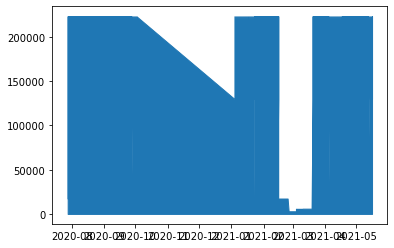

In [61]:
dfP1 = dfP[(dfP.Region=='Tarapacá') & (dfP.Fase==1)]       #Agrupar por región y fase 1 o cuarentena y luego graficar
fig, ax = plt.subplots()
ax.fill_between(dfP1["date"], dfP1["Poblacion"], color = 'tab:blue')
plt.show()

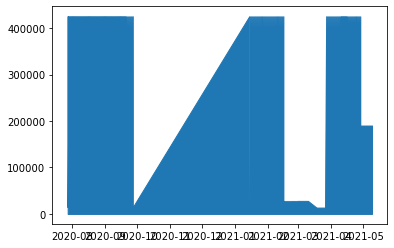

In [62]:
dfP2 = dfP[(dfP.Region=='Antofagasta') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP2["date"], dfP2["Poblacion"], color = 'tab:blue')
plt.show()

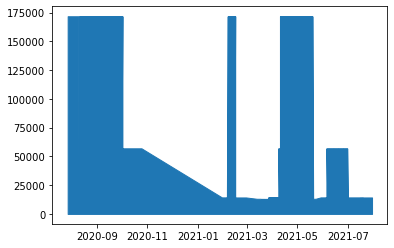

In [63]:
dfP3 = dfP[(dfP.Region=='Atacama') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP3["date"], dfP3["Poblacion"], color = 'tab:blue')
plt.show()

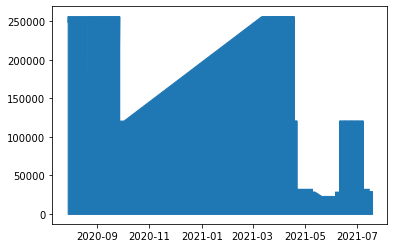

In [64]:
dfP4 = dfP[(dfP.Region=='Coquimbo') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP4["date"], dfP4["Poblacion"], color = 'tab:blue')
plt.show()

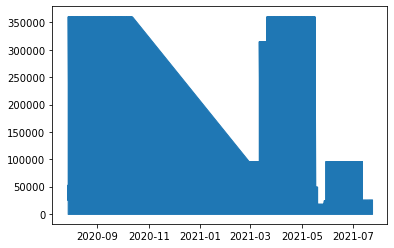

In [65]:
dfP5 = dfP[(dfP.Region=='Valparaíso') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP5["date"], dfP5["Poblacion"], color = 'tab:blue')
plt.show()

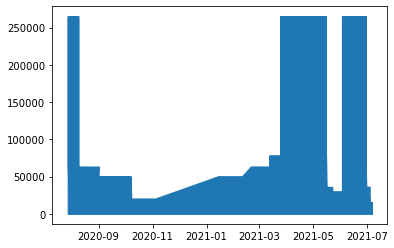

In [66]:
dfP6 = dfP[(dfP.Region=='O’Higgins') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP6["date"], dfP6["Poblacion"], color = 'tab:blue')
plt.show()

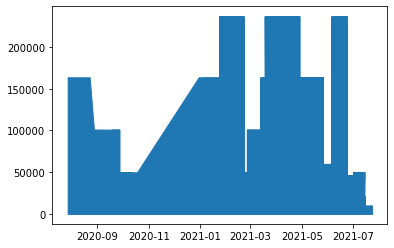

In [67]:
dfP7 = dfP[(dfP.Region=='Maule') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP7["date"], dfP7["Poblacion"], color = 'tab:blue')
plt.show()

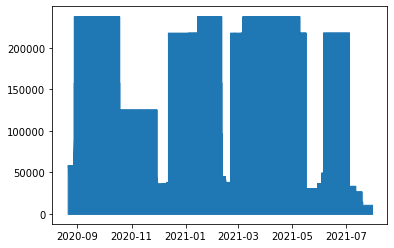

In [68]:
dfP8 = dfP[(dfP.Region=='Biobío') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP8["date"], dfP8["Poblacion"], color = 'tab:blue')
plt.show()

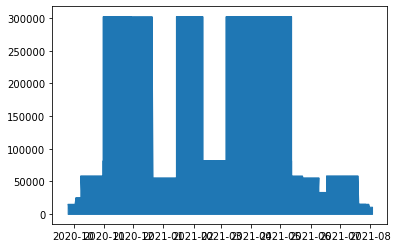

In [69]:
dfP9 = dfP[(dfP.Region=='Araucanía') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP9["date"], dfP9["Poblacion"], color = 'tab:blue')
plt.show()

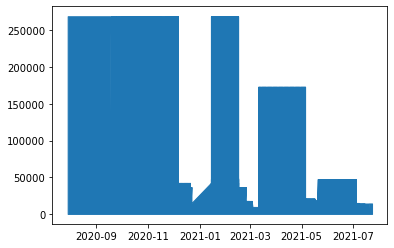

In [70]:
dfP10 = dfP[(dfP.Region=='Los Lagos') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP10["date"], dfP10["Poblacion"], color = 'tab:blue')
plt.show()

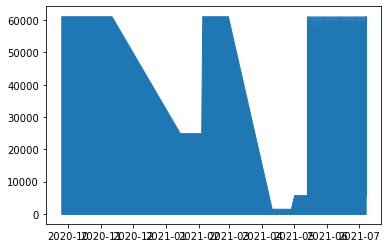

In [71]:
dfP11 = dfP[(dfP.Region=='Aysén') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP11["date"], dfP11["Poblacion"], color = 'tab:blue')
plt.show()

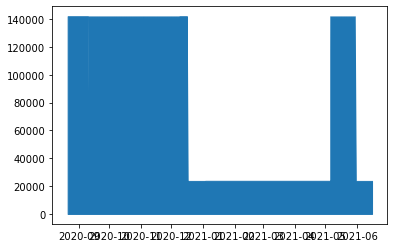

In [72]:
dfP12 = dfP[(dfP.Region=='Magallanes') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP12["date"], dfP12["Poblacion"], color = 'tab:blue')
plt.show()

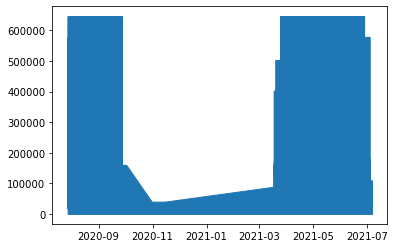

In [73]:
dfP13 = dfP[(dfP.Region=='Metropolitana') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP13["date"], dfP13["Poblacion"], color = 'tab:blue')
plt.show()

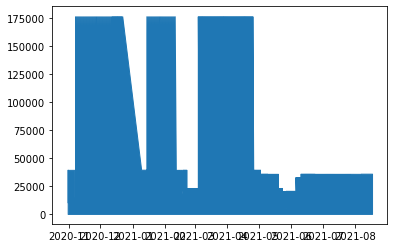

In [74]:
dfP14 = dfP[(dfP.Region=='Los Ríos') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP14["date"], dfP14["Poblacion"], color = 'tab:blue')
plt.show()

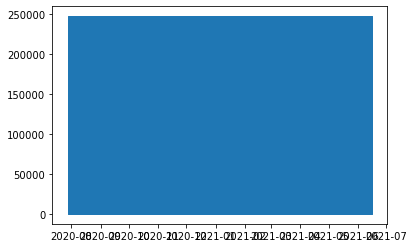

In [75]:
dfP15 = dfP[(dfP.Region=='Arica y Parinacota') & (dfP.Fase==1)]
fig, ax = plt.subplots()
ax.fill_between(dfP15["date"], dfP15["Poblacion"], color = 'tab:blue')
plt.show()

<AxesSubplot:xlabel='date', ylabel='Poblacion'>

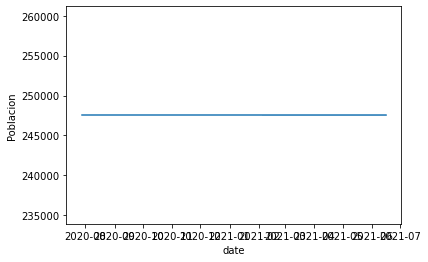

In [76]:
dfPAricaPrueba = dfP[(dfP.Region=='Arica y Parinacota') & (dfP.Fase==1)] #gráfico de prueba Arica, alternativo
sns.lineplot(x='date', y='Poblacion', data=dfPAricaPrueba)

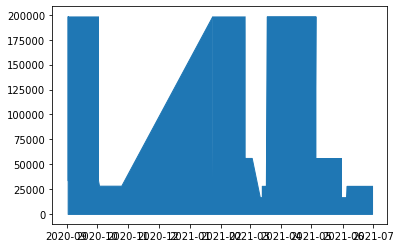

In [77]:
dfP16 = dfP[(dfP.Region=='Ñuble') & (dfP.Fase==1)]  
fig, ax = plt.subplots()
ax.fill_between(dfP16["date"], dfP16["Poblacion"], color = 'tab:blue')
plt.show()

<AxesSubplot:xlabel='date', ylabel='Poblacion'>

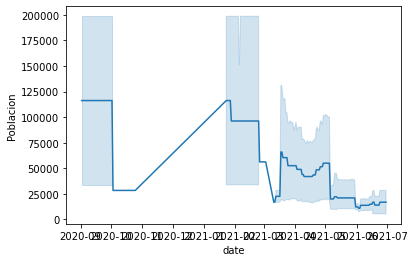

In [78]:
dfÑublePrueba = dfP[(dfP.Region=='Ñuble') & (dfP.Fase==1)] #gráfico de prueba Ñuble, alterntivo
sns.lineplot(x='date', y='Poblacion', data=dfÑublePrueba)

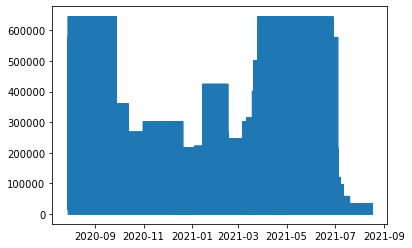

In [79]:
dfPCHILE = dfP[(dfP.Fase==1)] #Lo mismo anterior pero para todo el país
fig, ax = plt.subplots()
ax.fill_between(dfPCHILE["date"], dfPCHILE["Poblacion"], color = 'tab:blue')
plt.show()

In [80]:
dfPP = dfP[(dfP.Fase==1)]

In [81]:
dfPP.groupby(['date'])

In [82]:
dfP1Tarapacá = dfP1.groupby(['date']) #agrupar por fecha y luego sumar poblacion para obtener el dia con más personas en cuarentena.
# incompleto...

In [83]:
dfP1Tarapacá['Poblacion'].sum()

date
2020-07-28    370857.0
2020-07-29    370857.0
2020-07-30    370857.0
2020-07-31    370857.0
2020-08-01    370857.0
                ...   
2021-05-12    388252.0
2021-05-13    353462.0
2021-05-14    353462.0
2021-05-15    353462.0
2021-05-16    353462.0
Name: Poblacion, Length: 200, dtype: float64





##### Manuel Muñoz Riveros